In [1]:
import os
import subprocess
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from keras.models import model_from_json
from keras.preprocessing import image

%matplotlib inline

In [2]:
#load model
model = model_from_json(open("fer.json", "r").read())
#load weights
model.load_weights('fer.h5')
face_haar_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [3]:
os.chdir("../")
os.getcwd()

'/Users/kushalreddy_p/ASU Studies/ASU Work/CSI Lab/DataLogs/Log_Analyser'

In [4]:
# NON-AR Image Prediction

emotionCountData = []
df_EmotionCount = []
path = "../"
subpath = ""
os.chdir(path+"AR_Less Data/")
users = subprocess.check_output('ls').splitlines()
for user in users:
    if(user.decode("utf-8").startswith("User")):
        subpath = "{}/img/".format(user.decode("utf-8"))
        os.chdir(subpath)
        sections = subprocess.check_output('ls').splitlines()
        for section in sections:
            subpath = "{}".format(section.decode("utf-8"))
            os.chdir(subpath)
            images = subprocess.check_output('ls').splitlines()
            for imagename in images:
                imagename =imagename.decode("utf-8")
                img = cv2.imread(imagename)
                gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                faces_detected = face_haar_cascade.detectMultiScale(gray_img, 1.32, 5)
                for (x, y, w, h) in faces_detected:
                    cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), thickness=7)
                    roi_gray = gray_img[y:y + w, x:x + h]  # cropping region of interest i.e. face area from  image
                    roi_gray = cv2.resize(roi_gray, (48, 48))
                    img_pixels = image.img_to_array(roi_gray)
                    img_pixels = np.expand_dims(img_pixels, axis=0)
                    img_pixels /= 255
                    predictions = model.predict(img_pixels)
                    max_index = np.argmax(predictions[0])
                    emotions = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
                    predicted_emotion = emotions[max_index]
                    em = [False, False, False, False,False, False,False ]
                    em[max_index] = True
                    emotionCountData = [user.decode("utf-8"), section.decode("utf-8"), imagename, predicted_emotion, em[0], em[1], em[2], em[3], em[4], em[5], em[6]]
                    df_EmotionCount.append(emotionCountData)
            os.chdir("..")
        os.chdir("../..")
        
# Convert the list of records to DataFrame
df_EmotionCount_NAR = pd.DataFrame(df_EmotionCount, columns = ['User', 'Section', 'ImageName', 'Emotion', 'Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral' ])




In [5]:
# AR Image Prediction

emotionCountData = []
df_EmotionCount = []
path = "../"
subpath = ""
os.chdir(path+"AR Data/")
users = subprocess.check_output('ls').splitlines()
for user in users:
    if(user.decode("utf-8").startswith("User")):
        subpath = "{}/img/".format(user.decode("utf-8"))
        os.chdir(subpath)
        sections = subprocess.check_output('ls').splitlines()
        for section in sections:
            subpath = "{}".format(section.decode("utf-8"))
            os.chdir(subpath)
            images = subprocess.check_output('ls').splitlines()
            for imagename in images:
                imagename =imagename.decode("utf-8")
                img = cv2.imread(imagename)
                gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                faces_detected = face_haar_cascade.detectMultiScale(gray_img, 1.32, 5)
                for (x, y, w, h) in faces_detected:
                    cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), thickness=7)
                    roi_gray = gray_img[y:y + w, x:x + h]  # cropping region of interest i.e. face area from  image
                    roi_gray = cv2.resize(roi_gray, (48, 48))
                    img_pixels = image.img_to_array(roi_gray)
                    img_pixels = np.expand_dims(img_pixels, axis=0)
                    img_pixels /= 255
                    predictions = model.predict(img_pixels)
                    max_index = np.argmax(predictions[0])
                    emotions = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
                    predicted_emotion = emotions[max_index]
                    em = [False, False, False, False,False, False,False ]
                    em[max_index] = True
                        
                    emotionCountData = [user.decode("utf-8"), section.decode("utf-8"), imagename, predicted_emotion, em[0], em[1], em[2], em[3], em[4], em[5], em[6]]
                    df_EmotionCount.append(emotionCountData)
            os.chdir("..")
        os.chdir("../..")
        
# Convert the list of records to DataFrame
df_EmotionCount_AR = pd.DataFrame(df_EmotionCount, columns = ['User', 'Section', 'ImageName', 'Emotion' , 'Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral'])





In [6]:
mapping = {'User_2': "User_1", 'User_3': "User_2", 'User_4': "User_3", 'User_5': "User_4", 'User_6': "User_5", 'User_7': "User_6", 'User_8': "User_7", 'User_9': "User_8", 'User_10': "User_9",'User_11': "User_10",'User_12': "User_11",'User_13': "User_12",}
# Sec_Mapping = {'Section0': "Section_0",'Section 1': "Section_1",'Section2': "Section_2",'Section3': "Section_3",}

df_EmotionCount_NAR = df_EmotionCount_NAR[df_EmotionCount_NAR['User'] != "User_1"]
df_EmotionCount_NAR['User'] = df_EmotionCount_NAR['User'].apply(lambda x: mapping[x])
# df_EmotionCount_NAR['Section'] = df_EmotionCount_NAR['Section'].apply(lambda x: Sec_Mapping[x])


df_EmotionCount_AR = df_EmotionCount_AR[df_EmotionCount_AR['User'] != "User_1"]
df_EmotionCount_AR['User'] = df_EmotionCount_AR['User'].apply(lambda x: mapping[x])
# df_EmotionCount_AR['Section'] = df_EmotionCount_AR['Section'].apply(lambda x: Sec_Mapping[x])


In [7]:
df_EmotionCount_NAR.to_csv('/Users/kushalreddy_p/ASU Studies/ASU Work/CSI Lab/DataLogs/DataSet/NARdata.csv')
df_EmotionCount_AR.to_csv('/Users/kushalreddy_p/ASU Studies/ASU Work/CSI Lab/DataLogs/DataSet/ARdata.csv')

In [2]:
os.chdir("../../DataSet/CNN")
os.getcwd()


'/Users/kushalreddy_p/ASU Studies/ASU Work/CSI Lab/DataLogs/DataSet/CNN'

In [13]:


temp1 = ind_NAR.groupby(gp_cols4)[emo_cols].sum()
temp2 = temp1.groupby(gp_cols5).apply(lambda x: x / x.values.sum())


In [8]:
temp2

,Angry,Disgust,Fear,Happy,Sad,Surprise,Neutral
Section,,,,,,,
Section_0,0.003195,0.0,0.511182,0.015974,0.073482,0.009585,0.386581
Section_1,0.019417,0.0,0.582524,0.019417,0.067961,0.029126,0.281553
Section_2,0.023179,0.0,0.543046,0.013245,0.149007,0.006623,0.264901
Section_3,0.027941,0.0,0.576471,0.017647,0.127941,0.005882,0.244118


In [14]:
temp1

Angry  Disgust   Fear  Happy   Sad  Surprise  Neutral
User    Section                                                         
User_1  Section_0    0.0      0.0   36.0    0.0   0.0       0.0      0.0
        Section_1    0.0      0.0   10.0    0.0   0.0       0.0      0.0
        Section_2    0.0      0.0   25.0    0.0   0.0       0.0      0.0
        Section_3    0.0      0.0   22.0    0.0   0.0       0.0      0.0
User_10 Section_0    0.0      0.0    1.0    0.0   3.0       0.0     67.0
        Section_1    0.0      0.0    0.0    0.0   1.0       0.0     24.0
        Section_2    0.0      0.0    0.0    0.0   5.0       0.0     66.0
        Section_3    1.0      0.0    2.0    5.0  17.0       0.0    120.0
User_11 Section_0    0.0      0.0    1.0    0.0   8.0       0.0     13.0
        Section_1    0.0      0.0    2.0    0.0   2.0       0.0      3.0
        Section_2    0.0      0.0   13.0    0.0  12.0       0.0      4.0
        Section_3    3.0      0.0  180.0    0.0  21.0       4.0     28.0
User_12 Section_0    0.0      0.0    6.0    0.0   5.0       0.0      6.0
        Section_1    2.0      0.0    2.0    0.0   0.0       0.0      1.0
        Section_2    6.0      0.0    7.0    3.0   6.0       0.0      3.0
        Section_3   15.0      0.0   28.0    1.0  12.0       0.0      6.0
User_2  Section_0    0.0      0.0   32.0    0.0   0.0       0.0      0.0
        Section_1    0.0      0.0   13.0    0.0   0.0       0.0      0.0
        Section_2    0.0      0.0   42.0    0.0   0.0       0.0      0.0
        Section_3    0.0      0.0   26.0    0.0   0.0       0.0      0.0
User_3  Section_0    0.0      0.0   18.0    0.0   3.0       0.0      2.0
        Section_1    0.0      0.0   11.0    0.0   4.0       0.0      0.0
        Section_2    0.0      0.0   15.0    0.0  15.0       0.0      1.0
        Section_3    0.0      0.0   20.0    0.0   5.0       0.0      1.0
User_4  Section_0    0.0      0.0   33.0    0.0   0.0       3.0      0.0
        Section_1    0.0      0.0    7.0    0.0   0.0       3.0      0.0
        Section_2    0.0      0.0   22.0    0.0   0.0       2.0      0.0
        Section_3    0.0      0.0   17.0    0.0   0.0       0.0      0.0
User_5  Section_0    0.0      0.0    5.0    3.0   0.0       0.0     31.0
        Section_1    0.0      0.0    0.0    2.0   0.0       0.0      1.0
        Section_2    0.0      0.0    0.0    1.0   0.0       0.0      5.0
        Section_3    0.0      0.0    2.0    5.0   0.0       0.0      2.0
User_6  Section_0    1.0      0.0   15.0    1.0   0.0       0.0      2.0
        Section_1    0.0      0.0   10.0    0.0   0.0       0.0      0.0
        Section_2    1.0      0.0   24.0    0.0   0.0       0.0      1.0
        Section_3    0.0      0.0    7.0    0.0   1.0       0.0      2.0
User_7  Section_0    0.0      0.0   11.0    0.0   3.0       0.0      0.0
        Section_1    0.0      0.0    4.0    0.0   0.0       0.0      0.0
        Section_2    0.0      0.0   14.0    0.0   5.0       0.0      0.0
        Section_3    0.0      0.0   81.0    0.0  31.0       0.0      7.0
User_8  Section_0    0.0      0.0    2.0    1.0   0.0       0.0      0.0
        Section_1    0.0      0.0    1.0    0.0   0.0       0.0      0.0
        Section_2    0.0      0.0    2.0    0.0   0.0       0.0      0.0
        Section_3    0.0      0.0    7.0    1.0   0.0       0.0      0.0
User_9  Section_0    0.0      0.0    0.0    0.0   1.0       0.0      0.0
        Section_2    0.0      0.0    0.0    0.0   2.0       0.0      0.0

Text(0.5, 13.5, '')

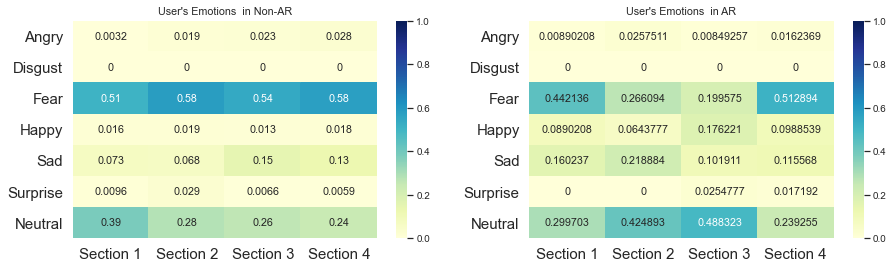

In [12]:
ind_NAR = pd.read_csv('NARdata.csv',index_col=0)
ind_AR = pd.read_csv('Ardata.csv',index_col=0)
ind_AR = ind_AR.replace(to_replace ="Section3", 
                 value ="Section_3") 
sns.set(font_scale=0.9)
gp_cols1 = ['User', 'd_ts']
gp_cols2 = ['User']
gp_cols3 = ['d_ts']
emo_cols = ['Angry','Disgust','Fear','Happy', 'Sad', 'Surprise', 'Neutral']
gp_cols4 = ['User', 'Section']
gp_cols5 = ['Section']

# user1_NAR = ind_NAR.loc[ind_NAR['User'] == "User_1"]
# user1_AR = ind_AR.loc[ind_AR['User'] == "User_1"]

user1_NAR = ind_NAR.groupby(gp_cols5)[emo_cols].sum()
user1_AR = ind_AR.groupby(gp_cols5)[emo_cols].sum()


emo_total_NAR = user1_NAR.groupby(gp_cols5).apply(lambda x: x / x.values.sum())
emo_total_AR = user1_AR.groupby(gp_cols5).apply(lambda x: x / x.values.sum())

# Plot 
fig, axes = plt.subplots(figsize=(15, 4), ncols=2)
ax = sns.heatmap(emo_total_NAR.transpose(), cmap='YlGnBu', ax =axes[0], vmax = 1.0 , annot = True)
ax.set_yticklabels(ax.get_yticklabels(),rotation=0, fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=15)
ax.set_xticklabels(["Section 1","Section 2","Section 3","Section 4"])
ax.set(title="User's Emotions  in Non-AR")
ax.set_xlabel("")  



# Plot 
ax = sns.heatmap(emo_total_AR.transpose(), cmap='YlGnBu', ax =axes[1], fmt='g',vmax =1.0, annot = True)
ax.set_yticklabels(ax.get_yticklabels(),rotation=0, fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=15)
ax.set_xticklabels(["Section 1","Section 2","Section 3","Section 4"])
ax.set(title="User's Emotions  in AR")
ax.set_xlabel("") 



In [10]:
os.chdir("../AR Data")
os.getcwd()

'/Users/kushalreddy_p/ASU Studies/ASU Work/CSI Lab/DataLogs/AR Data'

In [11]:
#AR_Score Calculation

subpath = ""
ind_score= []
tot_score_AR =[]
users = subprocess.check_output('ls').splitlines()
for user in users:
    if(user.decode("utf-8").startswith("User")):
        subpath = "{}/".format(user.decode("utf-8"))
        os.chdir(subpath)
        filess = subprocess.check_output('ls').splitlines()
        for files in filess:
            if files.decode("utf-8").startswith("Log"):
                
                f = open(files.decode("utf-8"), "r")
                contents = f.readlines()
                f.close()
                for line in contents:
                    if(line.startswith("Section")):
                        split = line.split('_')
                        
                        if(split[1].startswith("section")):
                            split = ""
                        else:
                            
                            str = split[7]
                            time = split[2]+'-'+split[3]+'-'+split[4]+'-'+split[5]+'-'+split[6]+'-'+str.splitlines()[0]
                            
                            if(split[1].startswith("Jump")):
                                default_score= [user.decode("utf-8"), split[0], True, False, False,  time, ]
                            elif(split[1].startswith("Positive")):
                                default_score= [user.decode("utf-8"), split[0], False, True, False, time, ]
                            elif(split[1].startswith("Negative")):
                                default_score= [user.decode("utf-8"), split[0], False, False, True, time, ]
                            else:
                                continue
                            
                            ind_score.append(default_score)
                        
                
        os.chdir("..")

tot_score_AR = pd.DataFrame(ind_score, columns = ['User', 'Section', 'Jump','Positive','Negative', 'Time'])
#tot_score = tot_score.groupby(['Time','User','Section']).sum()
tot_score_AR



,User,Section,Jump,Positive,Negative,Time
0,User_10,Section0,False,True,False,2019-12-11-12-23-45
1,User_10,Section0,False,False,True,2019-12-11-12-23-46
2,User_10,Section0,False,True,False,2019-12-11-12-23-47
3,User_10,Section0,False,True,False,2019-12-11-12-23-47
4,User_10,Section0,False,False,True,2019-12-11-12-23-48
...,...,...,...,...,...,...
1675,User_9,Section3,True,False,False,2019-12-4-15-8-31
1676,User_9,Section3,False,True,False,2019-12-4-15-8-31
1677,User_9,Section3,True,False,False,2019-12-4-15-8-34
1678,User_9,Section3,True,False,False,2019-12-4-15-8-35


In [12]:
os.chdir("../AR_Less Data/")
os.getcwd()

'/Users/kushalreddy_p/ASU Studies/ASU Work/CSI Lab/DataLogs/AR_Less Data'

In [13]:
#NAR_Score Calculation
subpath = ""
ind_score= []
tot_score_NAR =[]
users = subprocess.check_output('ls').splitlines()
for user in users:
    if(user.decode("utf-8").startswith("User")):
        subpath = "{}/".format(user.decode("utf-8"))
        os.chdir(subpath)
        filess = subprocess.check_output('ls').splitlines()
        for files in filess:
            if files.decode("utf-8").startswith("Log"):
                
                f = open(files.decode("utf-8"), "r")
                contents = f.readlines()
                f.close()
                for line in contents:
                    if(line.startswith("Section")):
                        split = line.split('_')
                        
                        if(split[1].startswith("section")):
                            split = ""
                        else:
                            
                            str = split[7]
                            time = split[2]+'-'+split[3]+'-'+split[4]+'-'+split[5]+'-'+split[6]+'-'+str.splitlines()[0]
                            
                            if(split[1].startswith("Jump")):
                                default_score= [user.decode("utf-8"), split[0], True, False, False, time, ]
                            elif(split[1].startswith("Positive")):
                                default_score= [user.decode("utf-8"), split[0], False, True, False, time, ]
                            elif(split[1].startswith("Negative")):
                                default_score= [user.decode("utf-8"), split[0], False, False, True, time, ]
                            else:
                                continue
                                
                            ind_score.append(default_score)
                        
                
        os.chdir("..")

tot_score_NAR = pd.DataFrame(ind_score, columns = ['User', 'Section', 'Jump','Positive','Negative', 'Time'])
#tot_score = tot_score.groupby(['Time','User','Section']).sum()
tot_score_NAR
        
        

,User,Section,Jump,Positive,Negative,Time
0,User_1,Section0,False,True,False,2019-11-20-11-28-44
1,User_1,Section0,True,False,False,2019-11-20-11-28-57
2,User_1,Section0,False,True,False,2019-11-20-11-28-57
3,User_1,Section0,False,False,True,2019-11-20-11-29-7
4,User_1,Section0,False,True,False,2019-11-20-11-29-13
...,...,...,...,...,...,...
893,User_9,Section3,True,False,False,2019-12-4-15-10-32
894,User_9,Section3,False,True,False,2019-12-4-15-10-34
895,User_9,Section3,True,False,False,2019-12-4-15-10-34
896,User_9,Section3,False,True,False,2019-12-4-15-10-40


In [14]:
mapping = {'User_2': "User_1", 'User_3': "User_2", 'User_4': "User_3", 'User_5': "User_4", 'User_6': "User_5", 'User_7': "User_6", 'User_8': "User_7", 'User_9': "User_8", 'User_10': "User_9",'User_11': "User_10",'User_12': "User_11",'User_13': "User_12",}
Sec_Mapping = {'Section0': "Section_0",'Section 1': "Section_1",'Section2': "Section_2",'Section3': "Section_3",}
sec_Score_NAR = tot_score_NAR.copy()
sec_Score_NAR = sec_Score_NAR[sec_Score_NAR['User'] != "User_1"]
sec_Score_NAR['User'] = sec_Score_NAR['User'].apply(lambda x: mapping[x])
sec_Score_NAR['Section'] = sec_Score_NAR['Section'].apply(lambda x: Sec_Mapping[x])

sec_Score_AR = tot_score_AR.copy()
sec_Score_AR = sec_Score_AR[sec_Score_AR['User'] != "User_1"]
sec_Score_AR['User'] = sec_Score_AR['User'].apply(lambda x: mapping[x])
sec_Score_AR['Section'] = sec_Score_AR['Section'].apply(lambda x: Sec_Mapping[x])






In [15]:
sec_Score_NAR.to_csv('/Users/kushalreddy_p/ASU Studies/ASU Work/CSI Lab/DataLogs/DataSet/NARScoredata.csv')
sec_Score_AR.to_csv('/Users/kushalreddy_p/ASU Studies/ASU Work/CSI Lab/DataLogs/DataSet/ARScoredata.csv')

Text(0.5, 13.5, '')

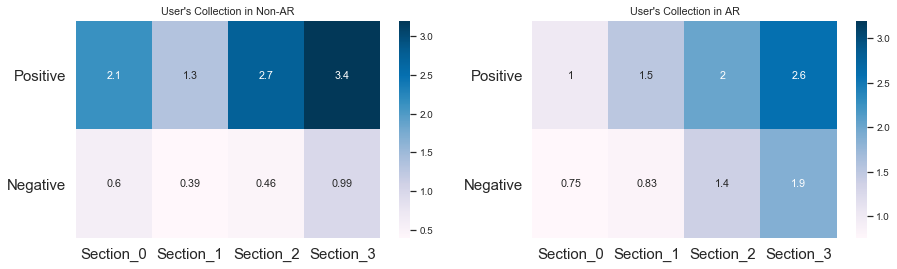

In [16]:


sns.set(font_scale=0.9)
gp_cols1 = ['User', 'd_ts']
gp_cols2 = ['User']
gp_cols3 = ['d_ts']
score_cols = ['Positive','Negative']
Jump = ['Jump']
gp_cols4 = ['User', 'Section']
gp_cols5 = ['Section']

# user1_NAR = ind_NAR.loc[ind_NAR['User'] == "User_1"]
# user1_AR = ind_AR.loc[ind_AR['User'] == "User_1"]

sec_Score_NAR1 = sec_Score_NAR.groupby(gp_cols4)[score_cols].sum()
sec_Score_AR1 = sec_Score_AR.groupby(gp_cols4)[score_cols].sum()

sec_Score_NAR2 = sec_Score_NAR1.groupby(gp_cols2).apply(
    lambda x: x / x.values.sum())
sec_Score_AR2 = sec_Score_AR1.groupby(gp_cols2).apply(
    lambda x: x / x.values.sum())

sec_Score_NAR3 = sec_Score_NAR2.groupby(gp_cols5).sum()
sec_Score_AR3 = sec_Score_AR2.groupby(gp_cols5).sum()


# Plot#1
fig, axes = plt.subplots(figsize=(15, 4), ncols=2)
ax = sns.heatmap(sec_Score_NAR3.transpose(), cmap='PuBu', ax =axes[0],annot =True,vmax = 3.2)
ax.set_yticklabels(ax.get_yticklabels(),rotation=0, fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=15)
#ax.set_xticklabels(["Section 1","Section 2","Section 3","Section 4"])
ax.set(title="User's Collection in Non-AR")
ax.set_xlabel("")  

# Plot#2
ax = sns.heatmap(sec_Score_AR3.transpose(), cmap='PuBu', ax =axes[1],annot =True, vmax = 3.2)
ax.set_yticklabels(ax.get_yticklabels(),rotation=0, fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=15)
#ax.set_xticklabels(["Section 1","Section 2","Section 3","Section 4"])
ax.set(title="User's Collection in AR")
ax.set_xlabel("") 








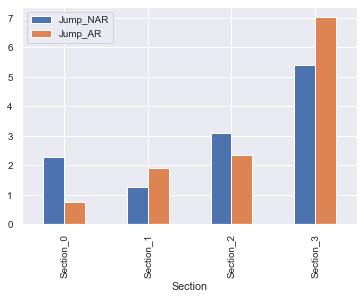

In [17]:
sec_Jump_NAR1 = sec_Score_NAR.groupby(gp_cols4)[Jump].sum()
sec_Jump_AR1 = sec_Score_AR.groupby(gp_cols4)[Jump].sum()

sec_Jump_NAR2 = sec_Jump_NAR1.groupby(gp_cols2).apply(
    lambda x: x / x.values.sum())
sec_Jump_AR2 = sec_Jump_AR1.groupby(gp_cols2).apply(
    lambda x: x / x.values.sum())


sec_Jump_NAR3 = sec_Jump_NAR2.groupby(gp_cols5).sum()
sec_Jump_AR3 = sec_Jump_AR2.groupby(gp_cols5).sum()



Jump_Table = sec_Jump_AR3.copy()
Jump_Table['Jump_NAR'] = sec_Jump_NAR3['Jump']
Jump_Table.rename(columns = {'Jump':'Jump_AR'}, inplace = True)
Jump_Table= Jump_Table.reset_index()


Jump_Table.plot(x='Section', y=["Jump_NAR", "Jump_AR"], kind="bar")




In [22]:
duplicateDFRow = df_EmotionCount_AR[df_EmotionCount_AR.duplicated()]
print(duplicateDFRow)


        User    Section                 ImageName Emotion  Angry  Disgust  \
2205  User_3  Section_3  front-11-26-10-20-05.jpg    fear  False    False   

      Fear  Happy    Sad  Surprise  Neutral  
2205  True  False  False     False    False  


In [23]:
ind_NAR

,User,Section,ImageName,Emotion,Angry,Disgust,Fear,Happy,Sad,Surprise,Neutral
195,User_9,Section_0,front-12-11-12-35-11.jpg,sad,False,False,False,False,True,False,False
196,User_9,Section_2,front-12-11-12-36-47.jpg,sad,False,False,False,False,True,False,False
197,User_9,Section_2,front-12-11-12-36-52.jpg,sad,False,False,False,False,True,False,False
198,User_10,Section_0,front-12-12-13-24-25.jpg,neutral,False,False,False,False,False,False,True
199,User_10,Section_0,front-12-12-13-24-26.jpg,fear,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1588,User_8,Section_3,front-12-04-15-10-17.jpg,fear,False,False,True,False,False,False,False
1589,User_8,Section_3,front-12-04-15-10-19.jpg,fear,False,False,True,False,False,False,False
1590,User_8,Section_3,front-12-04-15-10-28.jpg,fear,False,False,True,False,False,False,False
1591,User_8,Section_3,front-12-04-15-10-30.jpg,happy,False,False,False,True,False,False,False
